# Intrinsic Dimension: Supplementary Figure 01
This notebook generates Supplementary Figure 01, used in the intro to provide an intuition on what the different forms of intrinsic dimension represent.

In this work we rely on the scikit-dimension (https://scikit-dimension.readthedocs.io/en/latest/index.html) library for estimating both local and global ID. We will use plotly for generation of 3D scatter plots

In [1]:
import skdim
import pandas as pd
import plotly.express as px
from IPython.display import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import panel as pn
pn.extension('plotly')

In [2]:
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex

scikit-dimension provides different methods for ID estimation. For Supplementary Figure 01, we will use local PCA, one of the most commonly used methods. The next line creates an estimation object that we will use through the notebook.

In [3]:
pca=skdim.id.lPCA()

The following line creates a camera object with information of where to situate the camera when plotting 3D scatter plots. In other words, this allows us to automatically set the orientation of the axes in 3D plots

In [4]:
camera = dict( up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=1, y=2, z=2) )

The followning cell creates a color scale that will use across all images in this notebook

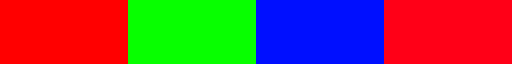

In [5]:
hsv4_cs  = get_cmap('hsv',4)
hsv4_map = {str(i):rgb2hex(hsv4_cs(i)) for i in range(4)}
hsv4_cs

## Datasets with varying local and global ID (Panel A in Supplementary Figure 01)

The first panel will show a dataset with points sitting on a 3D sphere. Such an object is expected to have a global ID = 3, yet locally it should have 2, as all datapoints lie on the surface of the sphere

In [6]:
sphere3d_data = pd.DataFrame(skdim.datasets.hyperSphere(n=5000, random_state = 0, d=3), columns=['x','y','z'])
sphere3d_data.loc[:,'IDlocal'] = pca.fit_pw(sphere3d_data,n_neighbors=25).dimension_pw_
sphere3d_data['IDlocal'] = sphere3d_data['IDlocal'].astype(str)
sphere3d_data['size'] = 1
sphere3d_trace = px.scatter_3d(sphere3d_data,x='x',y='y',z='z', width=400, height=400, color='IDlocal', size='size', size_max=5, color_discrete_map=hsv4_map)
sphere3d_trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))
sphere3d_trace.update_traces(marker=dict(line=dict(width=0)))
print('++ INFO: Global ID = %f for 3D shpere' % pca.fit(sphere3d_data).dimension_)

++ INFO: Global ID = 3.000000 for 3D shpere


The second panel will show a dataset with points forming a 3D ball. Such an object is expected to have both a global and local ID = 3.

In [7]:
ball3d_data = pd.DataFrame(skdim.datasets.hyperBall(n=5000, random_state = 0, d=3), columns=['x','y','z'])
ball3d_data.loc[:,'IDlocal'] = pca.fit_pw(ball3d_data,n_neighbors=25).dimension_pw_
ball3d_data['IDlocal'] = ball3d_data['IDlocal'].astype(str)
ball3d_data['size'] = 1
ball3d_trace = px.scatter_3d(ball3d_data,x='x',y='y',z='z', width=400, height=400, color='IDlocal', size='size', size_max=5, color_discrete_map=hsv4_map)
ball3d_trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))
ball3d_trace.update_traces(marker=dict(line=dict(width=0)))
print('++ INFO: Global ID = %f for 3D ball' % pca.fit(ball3d_data).dimension_)

++ INFO: Global ID = 3.000000 for 3D ball


Finally, panel (C) shows an example of a dataset sitting in a 3D space (global ID = 3), yet with 3 different distinct sections, a line (local ID = 1), an eliptical plane (local ID = 2) and an eliptical ball (local ID = 3).

In [8]:
lbs_data, clusters = skdim.datasets.lineDiskBall(n=5000, random_state = 0)
lbs_data = pd.DataFrame(lbs_data, columns=['x','y','z'])
lbs_data.loc[:,'IDlocal'] = pca.fit_pw(lbs_data,n_neighbors=25).dimension_pw_
lbs_data['IDlocal'] = lbs_data['IDlocal'].astype(str)
lbs_data['size'] = 1
lbs_trace = px.scatter_3d(lbs_data,x='x',y='y',z='z', width=400, height=400, color='IDlocal', size='size', size_max=5, color_discrete_map=hsv4_map)
lbs_trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))
lbs_trace.update_traces(marker=dict(line=dict(width=0)))
print('++ INFO: Global ID = %f for Line/Sphere/Ball dataset' % pca.fit(lbs_data).dimension_)

++ INFO: Global ID = 3.000000 for Line/Sphere/Ball dataset


In [9]:
pn.Row(pn.Column(pn.pane.Markdown('#(A)'),pn.pane.Plotly(sphere3d_trace)),
       pn.Column(pn.pane.Markdown('#(B)'),pn.pane.Plotly(ball3d_trace)), 
       pn.Column(pn.pane.Markdown('#(C)'),pn.pane.Plotly(lbs_trace)))

Row
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [2] Column
        [0] Markdown(str)
        [1] Plotly(Figure)

In [10]:
# Static version for github display
sphere3d_trace.write_image('../Outputs/SuppFig01/Sphere.png')
ball3d_trace.write_image('../Outputs/SuppFig01/Ball.png')
lbs_trace.write_image('../Outputs/SuppFig01/Mutli.png')

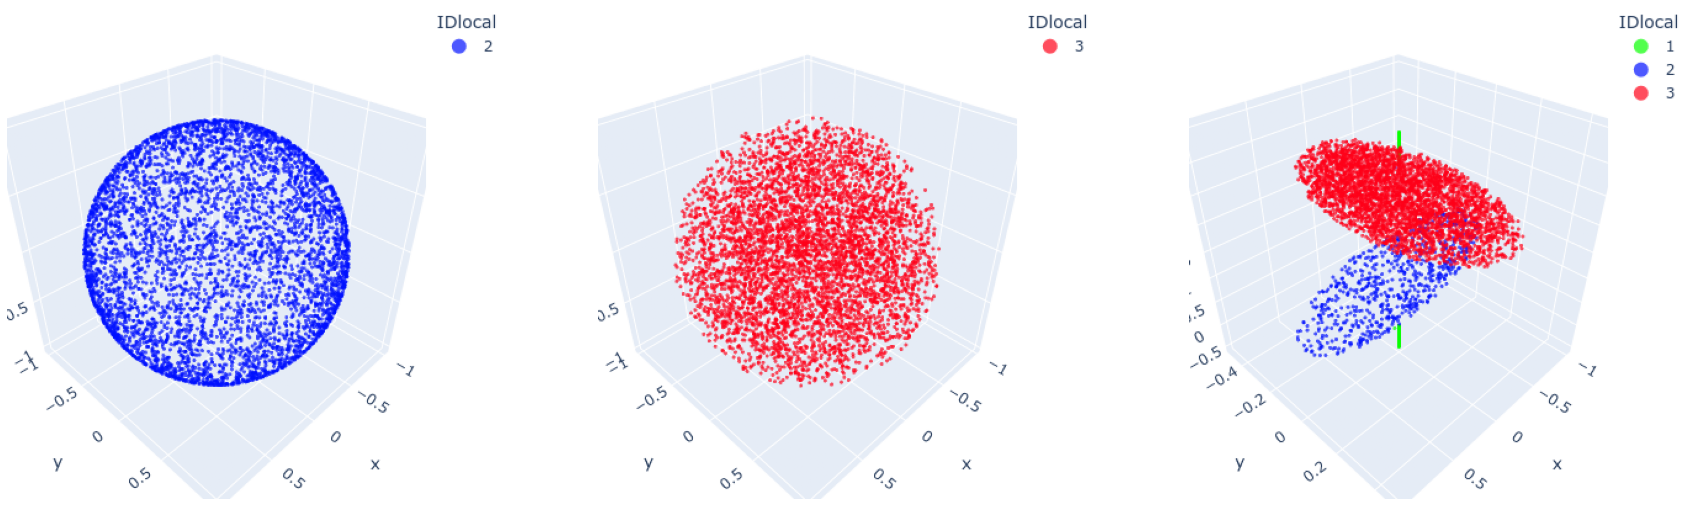

In [11]:
# Static version for github display
img1=mpimg.imread('../Outputs/SuppFig01/Sphere.png')
img2=mpimg.imread('../Outputs/SuppFig01/Ball.png')
img3=mpimg.imread('../Outputs/SuppFig01/Mutli.png')
fig,axs = plt.subplots(1, 3, figsize=(30,10), sharex=True, sharey=True) 
for i,img in enumerate([img1,img2,img3]):
    axs[i].imshow(img)
    axs[i].axis('off')

***
## Twin Peaks example

We will use this other dataset to explore how IDlocal depends on how well the manifold is sampled and also on the size of the neighborhood used for estimation.

First we create three equivalent datasets with different number of samples

In [12]:
tp2000_data  = pd.DataFrame(skdim.datasets.hyperTwinPeaks(n=2000, random_state = 0), columns=['x','y','z'])
tp5000_data  = pd.DataFrame(skdim.datasets.hyperTwinPeaks(n=5000, random_state = 0), columns=['x','y','z'])
tp10000_data = pd.DataFrame(skdim.datasets.hyperTwinPeaks(n=10000, random_state = 0), columns=['x','y','z'])

Next, we estimate the local ID for the three datasets using three different neighborhood sizes, namely 25, 50 and 100.

In [13]:
%%time
#local ID (pointwise estimates)
for data in [tp2000_data,tp5000_data,tp10000_data]:
    data['size'] = 1
    for knn in [25,50,100]:
        lid = pca.fit_pw(data,n_neighbors=knn).dimension_pw_
        data.loc[:,'IDlocal_knn{}'.format(str(knn))] = lid
        data['IDlocal_knn{}'.format(str(knn))] = data['IDlocal_knn{}'.format(str(knn))].astype(str)

CPU times: user 13.6 s, sys: 62.7 ms, total: 13.6 s
Wall time: 13.6 s


### Changes in IDlocal with data density

In [14]:
tp2000_trace = px.scatter_3d(tp2000_data,x='x',y='y',z='z', width=400, height=400, color='IDlocal_knn25', size='size', size_max=5, color_discrete_map=hsv4_map)
tp2000_trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))
tp2000_trace.update_traces(marker=dict(line=dict(width=0)))
tp2000_trace.update_layout(scene_camera=camera);

tp5000_trace = px.scatter_3d(tp5000_data,x='x',y='y',z='z', width=400, height=400, color='IDlocal_knn25', size='size', size_max=5, color_discrete_map=hsv4_map)
tp5000_trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))
tp5000_trace.update_traces(marker=dict(line=dict(width=0)))
tp5000_trace.update_layout(scene_camera=camera);

tp10000_trace = px.scatter_3d(tp10000_data,x='x',y='y',z='z', width=400, height=400, color='IDlocal_knn25', size='size', size_max=5, color_discrete_map=hsv4_map)
tp10000_trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))
tp10000_trace.update_traces(marker=dict(line=dict(width=0)))
tp10000_trace.update_layout(scene_camera=camera);

In [15]:
pn.Column(pn.pane.Markdown('# (D) Local ID as a function of sample density'),
          pn.Row(pn.pane.Plotly(tp2000_trace),pn.pane.Plotly(tp5000_trace),pn.pane.Plotly(tp10000_trace)))

Column
    [0] Markdown(str)
    [1] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)
        [2] Plotly(Figure)

In [16]:
# Static version for github display
tp2000_trace.write_image('../Outputs/SuppFig01/tp2000.png')
tp5000_trace.write_image('../Outputs/SuppFig01/tp5000.png')
tp10000_trace.write_image('../Outputs/SuppFig01/tp10000.png')

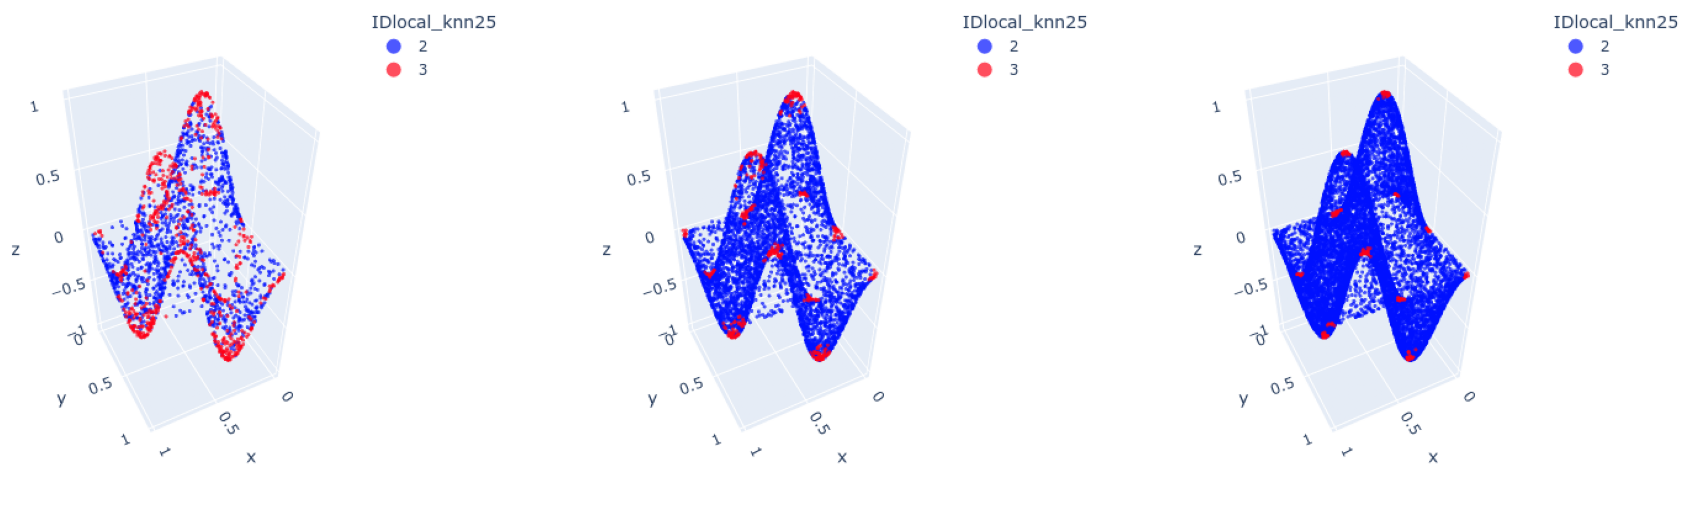

In [17]:
# Static version for github display
img1=mpimg.imread('../Outputs/SuppFig01/tp2000.png')
img2=mpimg.imread('../Outputs/SuppFig01/tp5000.png')
img3=mpimg.imread('../Outputs/SuppFig01/tp10000.png')
fig,axs = plt.subplots(1, 3, figsize=(30,10), sharex=True, sharey=True) 
for i,img in enumerate([img1,img2,img3]):
    axs[i].imshow(img)
    axs[i].axis('off')

### Changes in IDlocal as a function of neighborhood size

In [18]:
tp2000_knn25_trace = px.scatter_3d(tp2000_data,x='x',y='y',z='z', width=400, height=400, color='IDlocal_knn25', size='size', size_max=5, color_discrete_map=hsv4_map)
tp2000_knn25_trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))
tp2000_knn25_trace.update_traces(marker=dict(line=dict(width=0)))
tp2000_knn25_trace.update_layout(scene_camera=camera);

tp2000_knn50_trace = px.scatter_3d(tp2000_data,x='x',y='y',z='z', width=400, height=400, color='IDlocal_knn50', size='size', size_max=5, color_discrete_map=hsv4_map)
tp2000_knn50_trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))
tp2000_knn50_trace.update_traces(marker=dict(line=dict(width=0)))
tp2000_knn50_trace.update_layout(scene_camera=camera);

tp2000_knn100_trace = px.scatter_3d(tp2000_data,x='x',y='y',z='z', width=400, height=400, color='IDlocal_knn100', size='size', size_max=5, color_discrete_map=hsv4_map)
tp2000_knn100_trace.update_layout(margin=dict(l=0, r=0, b=0, t=0))
tp2000_knn100_trace.update_traces(marker=dict(line=dict(width=0)))
tp2000_knn100_trace.update_layout(scene_camera=camera);

In [19]:
pn.Column(pn.pane.Markdown('# (D) Local ID as a function of neighborhood size'),
          pn.Row(pn.pane.Plotly(tp2000_knn25_trace),pn.pane.Plotly(tp2000_knn50_trace),pn.pane.Plotly(tp2000_knn100_trace)))

Column
    [0] Markdown(str)
    [1] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)
        [2] Plotly(Figure)

In [20]:
# Static version for github display
tp2000_knn25_trace.write_image('../Outputs/SuppFig01/tp2000_knn25.png')
tp2000_knn50_trace.write_image('../Outputs/SuppFig01/tp2000_knn50.png')
tp2000_knn100_trace.write_image('../Outputs/SuppFig01/tp2000_knn100.png')

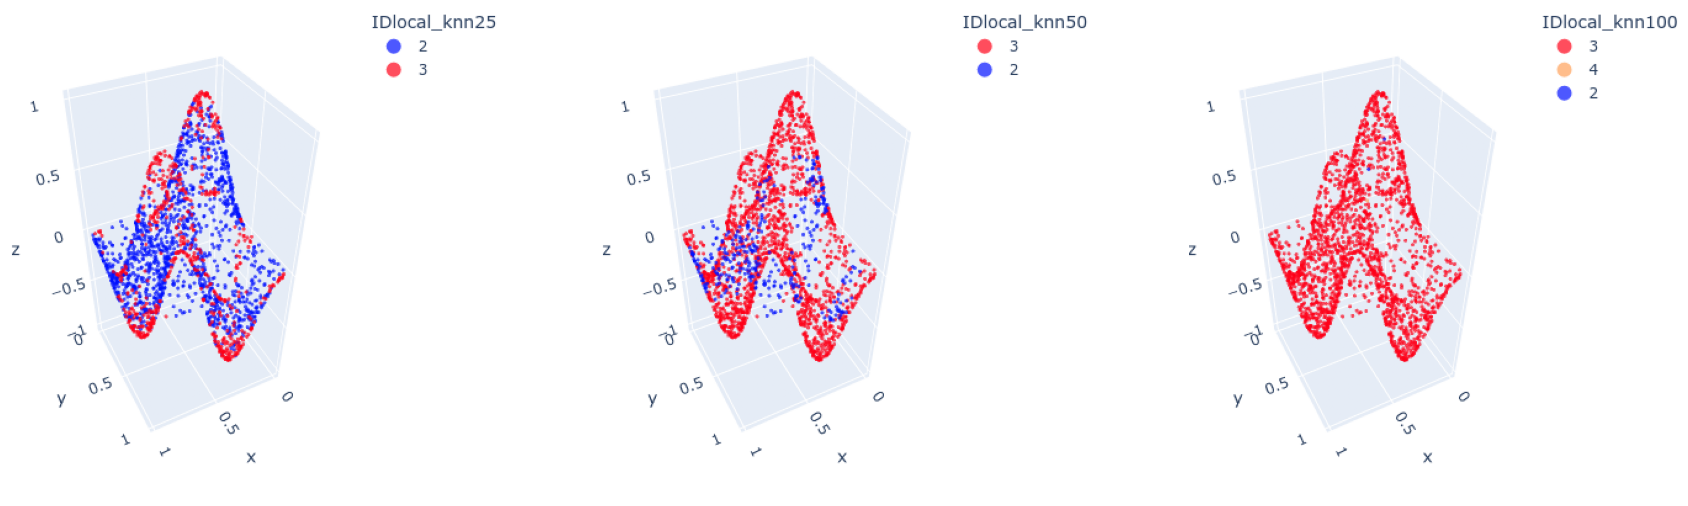

In [21]:
# Static version for github display
img1=mpimg.imread('../Outputs/SuppFig01/tp2000_knn25.png')
img2=mpimg.imread('../Outputs/SuppFig01/tp2000_knn50.png')
img3=mpimg.imread('../Outputs/SuppFig01/tp2000_knn100.png')
fig,axs = plt.subplots(1, 3, figsize=(30,10), sharex=True, sharey=True) 
for i,img in enumerate([img1,img2,img3]):
    axs[i].imshow(img)
    axs[i].axis('off')